In [1]:
import pandas as pd
# Importing and converting the data
training_data = pd.read_csv('./data.csv')
training_data_x = training_data['length'].to_numpy()
training_data_y = training_data['weight'].to_numpy()

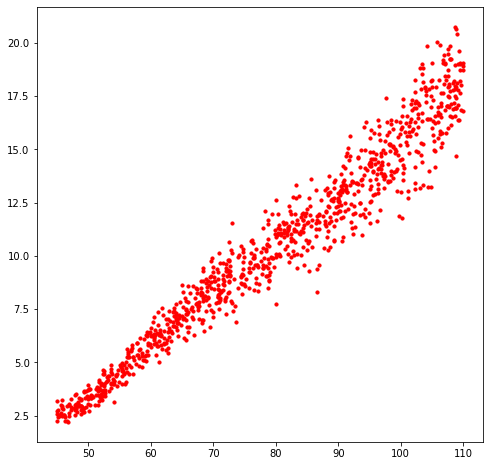

In [2]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(8, 8))
plt.scatter(training_data_x, training_data_y, c='red', s=10, label='Original data')
plt.show()

In [3]:
import torch
torch.set_default_dtype(torch.float64)
# Training the model
x_train = torch.reshape(torch.tensor(training_data_x), (-1, 1))
y_train = torch.reshape(torch.tensor(training_data_y), (-1, 1))

w1 = torch.rand(1, 1, requires_grad=True)
b1 = torch.rand(1, requires_grad=True)
lr = 0.0001
epochs = 600000
stepping = 10000

In [4]:
# Training the model with with manual optimizer

for i in range(1, epochs):
    y_pred = ((x_train @ w1) + b1)

    loss = (((y_pred - y_train).pow(2).sum())/training_data_y.size)


    if i % stepping == 0:
        print ("iteration: ", i, "loss: ", loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

print("trained w1: ",w1)
print("trained b1: ",b1)


iteration:  10000 loss:  4.7373576074125525
iteration:  20000 loss:  4.003169749353409
iteration:  30000 loss:  3.412987256800049
iteration:  40000 loss:  2.938564572342589
iteration:  50000 loss:  2.5571962898744807
iteration:  60000 loss:  2.2506304960423456
iteration:  70000 loss:  2.00419525150732
iteration:  80000 loss:  1.806096406264687
iteration:  90000 loss:  1.646853143149012
iteration:  100000 loss:  1.5188442351886053
iteration:  110000 loss:  1.4159433011295461
iteration:  120000 loss:  1.3332256028151321
iteration:  130000 loss:  1.2667323520298048
iteration:  140000 loss:  1.2132812467633578
iteration:  150000 loss:  1.1703141693463206
iteration:  160000 loss:  1.1357747574378225
iteration:  170000 loss:  1.1080099885333434
iteration:  180000 loss:  1.0856910679228464
iteration:  190000 loss:  1.0677498338743534
iteration:  200000 loss:  1.0533276364571775
iteration:  210000 loss:  1.0417342433952612
iteration:  220000 loss:  1.0324148062248875
iteration:  230000 loss:  

In [5]:
training_data_optim = pd.read_csv('./data.csv')
training_data_x_optim = training_data_optim['length'].to_numpy()
training_data_y_optim = training_data_optim['weight'].to_numpy()

x_train_optim = torch.reshape(torch.tensor(training_data_x_optim), (-1, 1))
y_train_optim = torch.reshape(torch.tensor(training_data_y_optim), (-1, 1))

w2 = torch.rand(1, 1, requires_grad=True)
b2 = torch.rand(1, requires_grad=True)

optimiser = torch.optim.SGD([{'params': w2 }, {'params': b2}], lr=0.0001)


for i in range(1, epochs):
    optimiser.zero_grad()

    y_pred_optimised = ((x_train_optim @ w2) + b2)

    loss_optimised = (((y_pred_optimised - y_train_optim).pow(2).sum())/training_data_y_optim.size)

    if i % stepping == 0:
        print ("iteration: ", i, "loss: ", loss_optimised.item())

    loss_optimised.backward()
    optimiser.step()

print("trained optimised w2: ",w2)
print("trained optimised b2: ",b2)


iteration:  10000 loss:  4.819393789037135
iteration:  20000 loss:  4.069115157765292
iteration:  30000 loss:  3.4659979748087464
iteration:  40000 loss:  2.9811776411137525
iteration:  50000 loss:  2.5914511292410563
iteration:  60000 loss:  2.278166509145051
iteration:  70000 loss:  2.0263302850270675
iteration:  80000 loss:  1.823889821277011
iteration:  90000 loss:  1.6611565151099164
iteration:  100000 loss:  1.5303421095039424
iteration:  110000 loss:  1.4251859548291566
iteration:  120000 loss:  1.3406553802738226
iteration:  130000 loss:  1.2727048351368788
iteration:  140000 loss:  1.2180822727244627
iteration:  150000 loss:  1.174173510572728
iteration:  160000 loss:  1.1388771182295554
iteration:  170000 loss:  1.1105038448465
iteration:  180000 loss:  1.0876957732837638
iteration:  190000 loss:  1.0693613315227406
iteration:  200000 loss:  1.0546230510958468
iteration:  210000 loss:  1.0427755723030432
iteration:  220000 loss:  1.0332518863857978
iteration:  230000 loss:  1

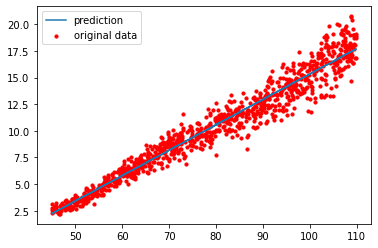

In [6]:
predicted_tensor = ((x_train @ w1).clamp(min=0) + b1).detach().numpy()

plt.scatter(training_data_x, training_data_y, c='red', s=10, label='original data')

plt.plot(training_data_x, predicted_tensor, label='prediction')

plt.legend()

plt.show()

scikit w1:  [[0.23857938]]
scikit b1:  [-8.52676636]


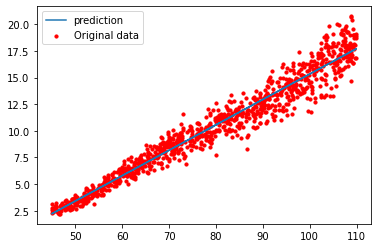

In [7]:
# scikit reference
import sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print("scikit w1: ", reg.coef_)
print("scikit b1: ", reg.intercept_)
scikit_prediction = reg.predict(x_train)

plt.scatter(training_data_x, training_data_y, c='red', s=10, label='Original data')

plt.plot(x_train, scikit_prediction, label='prediction')

plt.legend()

plt.show()